In [1]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# make the original data
series = np.sin((0.1 * np.arange(400)) ** 2)

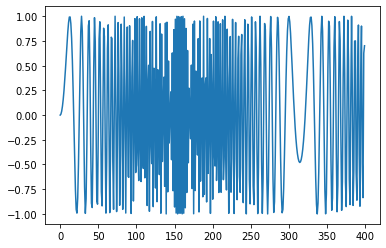

In [3]:
# plot it
plt.plot(series)
plt.show()

In [4]:
### build the dataset
# let's see if we can use T pas values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape:", X.shape, ", Y.shape:", Y.shape)

X.shape: (390, 10) , Y.shape: (390,)


In [5]:
### try autoregressive RNN model
i= Input(shape=(T, ))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01),
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80


2022-03-16 09:00:14.449787: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 0s 18ms/step - loss: 1.1976 - val_loss: 1.7358
Epoch 2/80
7/7 [==============================] - 0s 5ms/step - loss: 1.0323 - val_loss: 1.5369
Epoch 3/80
7/7 [==============================] - 0s 4ms/step - loss: 0.9078 - val_loss: 1.3721
Epoch 4/80
7/7 [==============================] - 0s 5ms/step - loss: 0.8202 - val_loss: 1.2228
Epoch 5/80
7/7 [==============================] - 0s 4ms/step - loss: 0.7491 - val_loss: 1.0875
Epoch 6/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6856 - val_loss: 0.9800
Epoch 7/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6376 - val_loss: 0.8955
Epoch 8/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6005 - val_loss: 0.8214
Epoch 9/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5687 - val_loss: 0.7491
Epoch 10/80
7/7 [==============================] - 0s 5ms/step - loss: 0.5439 - val_loss: 0.7026
Epoch 11/80
7/7 [==============================] 

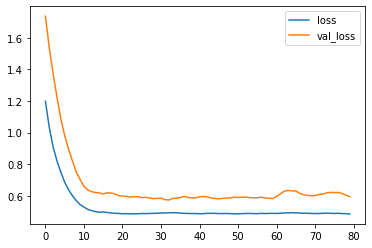

In [6]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(390, 1)


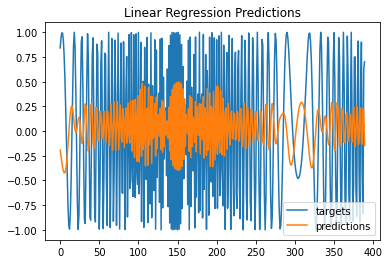

In [7]:
# One-step forecast using true tragers
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

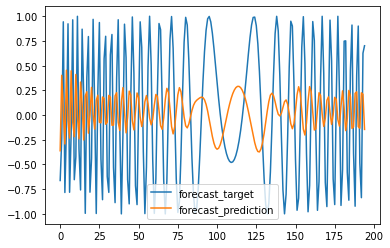

In [8]:
# This is the code we had before - it does the same thing
# One-step forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) <len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

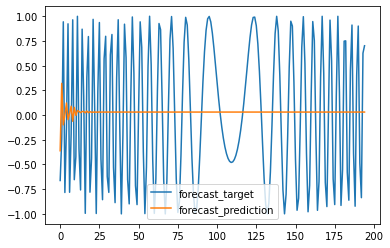

In [9]:
# Multi-step forecast
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast_target')
plt.plot(validation_predictions, label='forecast_prediction')
plt.legend()

## RNN

In [10]:
### Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
## after executing all code, change to LSTM
x = SimpleRNN(10)(i)
# x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 1s 30ms/step - loss: 0.6915 - val_loss: 0.6509
Epoch 2/80
7/7 [==============================] - 0s 6ms/step - loss: 0.4656 - val_loss: 0.5154
Epoch 3/80
7/7 [==============================] - 0s 7ms/step - loss: 0.3521 - val_loss: 0.3698
Epoch 4/80
7/7 [==============================] - 0s 6ms/step - loss: 0.2939 - val_loss: 0.3276
Epoch 5/80
7/7 [==============================] - 0s 7ms/step - loss: 0.2082 - val_loss: 0.1853
Epoch 6/80
7/7 [==============================] - 0s 6ms/step - loss: 0.1872 - val_loss: 0.1830
Epoch 7/80
7/7 [==============================] - 0s 5ms/step - loss: 0.1588 - val_loss: 0.1838
Epoch 8/80
7/7 [==============================] - 0s 6ms/step - loss: 0.1352 - val_loss: 0.1392
Epoch 9/80
7/7 [==============================] - 0s 7ms/step - loss: 0.1020 - val_loss: 0.1185
Epoch 10/80
7/7 [==============================] - 0s 7ms/step - loss: 0.1128 - val_loss: 0.1739
Epoch 11/80
7/7 [==============================] 

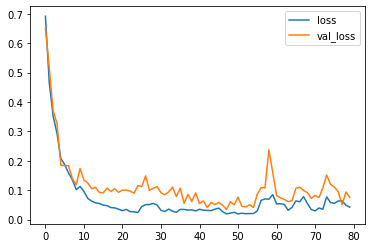

In [11]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


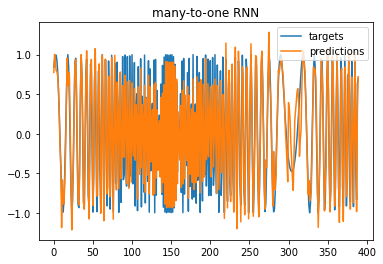

In [12]:
# One-step forecast using true tragers
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

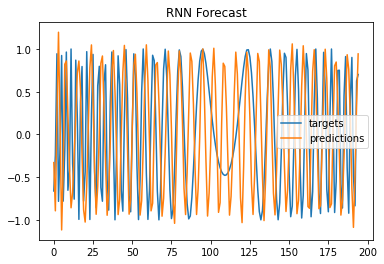

In [13]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='predictions')
plt.title("RNN Forecast")
plt.legend()
plt.show()

## LSTM

In [14]:
### Now try RNN/LSTM model
X = X.reshape(-1, T, 1) # make it N x T x D

# make the RNN
i = Input(shape=(T, D))
## after executing all code, change to LSTM
# x = SimpleRNN(10)(i)
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.05),
)

# train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


7/7 [==============================] - 2s 67ms/step - loss: 0.5537 - val_loss: 0.5158
Epoch 2/200
7/7 [==============================] - 0s 8ms/step - loss: 0.5005 - val_loss: 0.5384
Epoch 3/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5037 - val_loss: 0.5516
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4659 - val_loss: 0.5543
Epoch 5/200
7/7 [==============================] - 0s 7ms/step - loss: 0.4214 - val_loss: 0.5862
Epoch 6/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3604 - val_loss: 0.5459
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3364 - val_loss: 0.5026
Epoch 8/200
7/7 [==============================] - 0s 7ms/step - loss: 0.2447 - val_loss: 0.4237
Epoch 9/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1903 - val_loss: 0.2755
Epoch 10/200
7/7 [==============================] - 0s 7ms/step - loss: 0.1749 - val_loss: 0.2793
Epoch 11/200
7/7 [======================

Epoch 85/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0186
Epoch 86/200
7/7 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 0.0200
Epoch 87/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0162
Epoch 88/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0021 - val_loss: 0.0195
Epoch 89/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0168
Epoch 90/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0024 - val_loss: 0.0139
Epoch 91/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 0.0251
Epoch 92/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0027 - val_loss: 0.0139
Epoch 93/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0194
Epoch 94/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0020 - val_loss: 0.0167
Epoch 95/200
7/7 [==

7/7 [==============================] - 0s 7ms/step - loss: 9.7124e-04 - val_loss: 0.0128
Epoch 168/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.0130
Epoch 169/200
7/7 [==============================] - 0s 6ms/step - loss: 8.4881e-04 - val_loss: 0.0110
Epoch 170/200
7/7 [==============================] - 0s 6ms/step - loss: 9.2209e-04 - val_loss: 0.0125
Epoch 171/200
7/7 [==============================] - 0s 6ms/step - loss: 9.4691e-04 - val_loss: 0.0116
Epoch 172/200
7/7 [==============================] - 0s 6ms/step - loss: 7.1690e-04 - val_loss: 0.0133
Epoch 173/200
7/7 [==============================] - 0s 7ms/step - loss: 7.4252e-04 - val_loss: 0.0096
Epoch 174/200
7/7 [==============================] - 0s 7ms/step - loss: 0.0018 - val_loss: 0.0163
Epoch 175/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0010 - val_loss: 0.0115
Epoch 176/200
7/7 [==============================] - 0s 6ms/step - loss: 0.0011 - val_loss: 0.0139


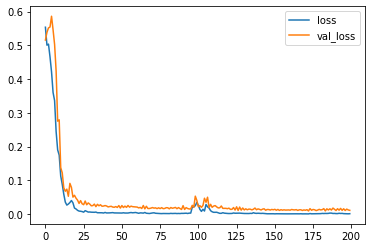

In [15]:
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


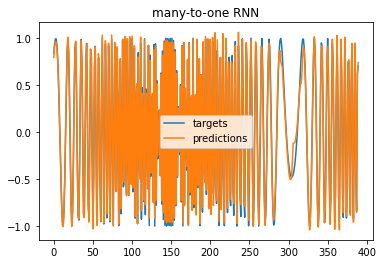

In [16]:
# One-step forecast using true tragers
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

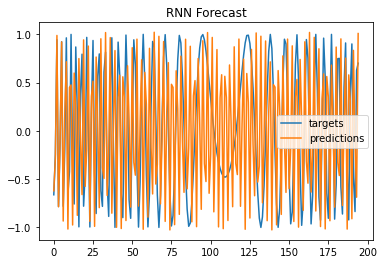

In [17]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='predictions')
plt.title("RNN Forecast")
plt.legend()
plt.show()